# Base code for agent-based modelling

#### to do list
* include agent id?

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from ABM_functions import *
import pandas as pd

#### Setting up parameters

In [2]:
company_titles = ['Department Head', 'Leader', 'Senior', 'Junior'] # job titles for agents in company
titles_n = [20, 100, 1000, 1000] # number of agents in each job title

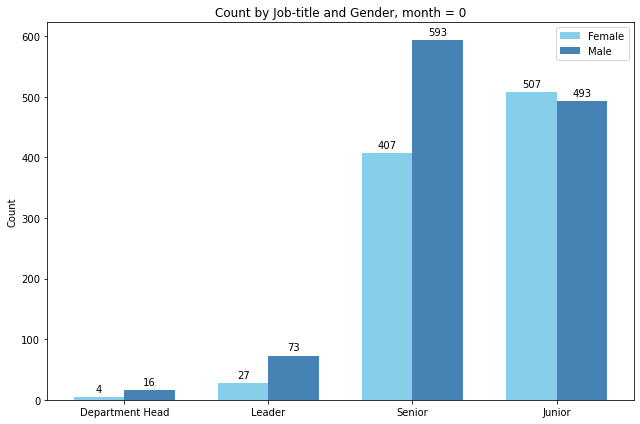

tick 0 done
tick 1 done
tick 2 done
tick 3 done
tick 4 done
tick 5 done
tick 6 done
tick 7 done
tick 8 done
tick 9 done
tick 10 done
tick 11 done
tick 12 done
tick 13 done
tick 14 done
tick 15 done
tick 16 done
tick 17 done
tick 18 done
tick 19 done
tick 20 done
tick 21 done
tick 22 done
tick 23 done
tick 24 done
tick 25 done
tick 26 done
tick 27 done
tick 28 done
tick 29 done


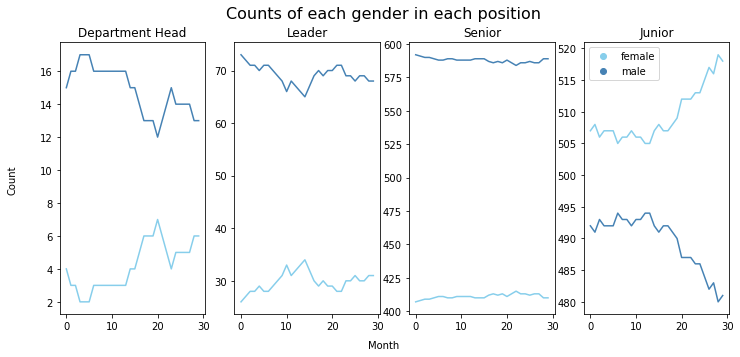

In [3]:
run_abm(30, save_path='data/data.csv', company_titles = company_titles, titles_n = titles_n)

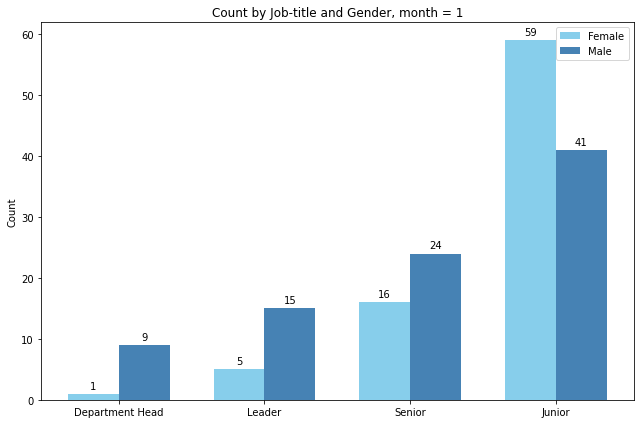

<AxesSubplot:title={'center':'Count by Job-title and Gender, month = 1'}, ylabel='Count'>

In [4]:
company = create_company(['Department Head', 'Leader', 'Senior', 'Junior'], [10, 20, 40, 100])
populate_company(company)
plot_gender(company, 0)